# Введение в проблему оценки внутренней размерности данных. Анализ работы TWO-NN и C-PCA
Роман Дьяченко 
ВМК МГУ 2022

## ABSTRACT
**Методы уменьшения размерности** - это методы предварительной обработки, используемые для решения задач с высокой
размерностью. Их цель состоит в том, чтобы спроецировать исходный набор данных размерности $N$
без потери информации на более низкое $M$-мерное подмногообразие. Поскольку значение $M$
неизвестно, весьма полезны методы, позволяющие заранее узнать значение $M$, называемое внутренним измерением (Intrinsic dimension (аббр. ID)). 

Цель моей работы состоит в том, чтобы представить классификацию существующих методов оценки (ID) и провести сравнение некоторых из них.

## Введение

Оценка внутренней размерности (ID) набора данных является классической задачей распознавания образов и машинного обучения. Оценка внутренней размерности актуальна в машинном обучении не только для методов уменьшения размерности, но и по ряду других причин. Использование большего количества измерений, чем необходимо, приводит к ряду проблем, таких как увеличение пространства, необходимого для хранения
данных и снижение скорости алгоритмов, поскольку она обычно зависит от размерности данных.

## Формальное опредление внутренней размерности

Дан набор данных $X_N\equiv(x_i)_{i=1}^N \subset \Re^D$, его внутренняя размерность (id) - это минимальное количество параметров, необходимых для представления данных без
потери информации


## Требования к идеальному алгоритму поиска ID
Прежде чем описывать различные методы оценки ID, необходимо определить критерии, позволяющие сравнивать их друг с другом:



1.   быть осуществимым с вычислительной точки зрения
2.   быть устойчивым к масштабированию(шуму)
3.   быть устойчивым к высоким размерностям данных
4.   иметь стабильную минимальную мощность данных необходимую для надёжной оценки 
5.   быть точным, т.е. давать верную оценку ID

На сегодняшний день ни один алгоритм не соответствует всем этим критериям, и обычно рекомендуется использовать совокупность оценщиков.

## Классификация алгоритомов оценки ID
Алгоритмы оценки ID можно разделить на три группы: **локальные**, **глобальные** и **точечные**.


*   Наборы данных могут состоять из сложных структур с зонами различной размерности. В таком случае набор данных следует исследовать с использованием **локальных** оценок, которые рассчитывают ID для каждой точки, посмотрев на ее окрестности. Окрестности обычно определяются путем взятия шара с фиксированным радиусом или путем рассмотрения $k$ ближайших соседей. 
*   Алгоритмы, относящиеся к глобальной категории, используют весь набор данных, предоставляя уникальную и глобальную оценку ID для набора данных.
*   К точечным относятся алгоритмы, которые могут производить как глобальную оценку ID всего набора данных, так и локальную оценку ID отдельных подмножеств набора данных.



# [Intrinsic dimension estimation of data by principal component analysis](https://arxiv.org/abs/1002.2050)
Mingyu Fan, Nannan Gu, Hong Qiao and Bo Zhang

Анализ главных компонент (PCA) является мощным инструментом
для определения размерности наборов данных с линейной
структурой; однако он становится неэффективным, когда данные имеют нелинейную структуру. В этой статье предлагается новый основанный на PCA метод оценки внутренней размерности данных с нелинейными структурами. Метод работает, сначала находя минимальное покрытие набора данных, затем выполняя PCA
локально для каждого подмножества в покрытии и, наконец, предоставляя результат оценки путем проверки дисперсии данных по окрестностям. Предлагаемый метод использует весь набор данных для оценки его внутренней размерности и удобен для постепенного обучения. Кроме того, процедура PCA может отфильтровывать шум в данных и сходиться к стабильной оценке с увеличением размера окрестности.


## Метод главных компонент 
(англ. principal component analysis, PCA) 
— один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.


### Принцип максимизации дисперсии
Существует такое предположение, что чем больше дисперсия значений рассматриваемого признака $x_j$ в матрице $X$, тем более значим признак для объяснения значений целевой переменной $y$, естественно, при условии масштабированности признакового пространства. Данное предположение появилось вследствии еще одного, не менее загадочного предположения о том, что дисперсия, являющаяся мерой изменчивости данных, может отражать уровень их информативности.

В основе PCA лежит именно этот принцип.


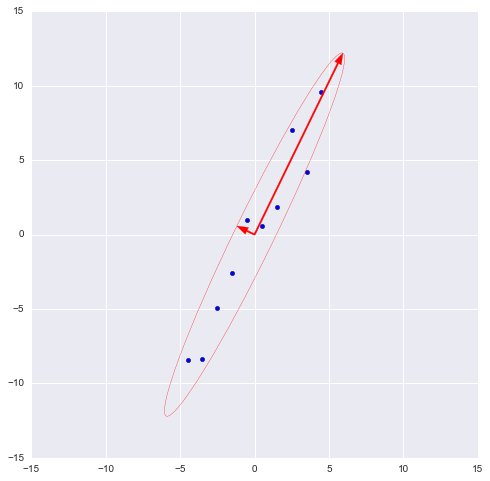

На этом графике изображена компонента данных, вдоль которой достигается максимальная дисперсия.

### Поиск гланых компанент

Пусть $$X\equiv(x_i)_{i=1}^N \subset \Re^D$$ 
и $$\overline x = \frac{1}{N} \sum_{i=1}^N x_{i}$$ 

Матрицу ковариации для нашей выборки $X$ можно представить в виде: $$C = \frac{1}{N} \sum_{i=1}^N (x_{i} - \overline x)(x_{i} - \overline x)^T$$ .

Собственные значения: $\lambda_{1} \geq \lambda_{2} \geq ... \geq \lambda_{N} \geq 0$ и вектора: $v_{1},...,v_{N}$ матрицы $C$.

 Из [отношения Релея](https://ru.wikipedia.org/wiki/Отношение_Рэлея) вытекает, что максимальная вариация нашего набора данных будет достигаться вдоль собственного вектора этой матрицы, соответствующего максимальному собственному значению. Таким образом главные компоненты, на которые мы бы хотели спроецировать наши данные, являются просто собственными векторами соответствующих топ-$d$ штук собственных значений этой матрицы.

Таким образом, алгоритм сводится к поиску наибольших компанент и проецированию данных на гиперплоскость, которую они образуют.

### Выбор оптимального числа компанент (ID)

Наиболее часто используемые критерии для оценки ID с помощью метода PCA:


1.   $$\frac{\min_{i=1,...,d} (var(v_i))}{\max_{j=d+1,...,D} (var(v_j))} > \alpha \gg  1$$


2.  $$\frac{\sum_{i=1}^d var(v_i)}{\sum_{i=1}^N var(v_i)} > \beta ,  0 < \beta < 1$$




## Особенности C-PCA по отношению к PCA

Для методов оценки внутренней размерности на основе PCA существуют две проблемы:

1.   фильтрация шума в данных
2.   стандартный PCA работает лишь на линейных многообразиях, поэтому в общем случае приходится решать задачу покрытия 


### Решение проблемы шума
Рассматривается влияние аддитивного белого шума $\mu$ c $$E( \mu) = 0$$ и $$var(\mu) = \sigma ^ 2$$

Тогда ковариационная матрица приобретает вид:

$$ C'= var(X + \mu) = C + \sigma^2I$$

Заметим, что собственный значения $C'$:$$ \lambda_{i}' = \lambda_{i} + \sigma^2 $$

Тогда $\sigma ^ 2$ можно оценить по формуле:
$$\widehat{\sigma} ^ 2 = \frac{1}{N - r + 1} \sum_{i = r}^N var(v_i)$$

где, $r$ вычисляется так:

$$\frac{\sum_{i=1}^{r-1} var(v_i)}{\sum_{i=1}^N var(v_i)} < P$$ и $$\frac{\sum_{i=1}^{r} var(v_i)}{\sum_{i=1}^N var(v_i)} > P$$, $$ (P = 0.95) $$


Таким образом, наши критерии (1) и (2) теперь будут рассматриваться с $$var(v_{i}) = \lambda_{i} - \widehat{\sigma} ^ 2$$

### Решение проблемы покрытия

Многообразие может быть локально аппроксимировано линейными подпространствами. Размерность каждого линейного подпространства должна быть равна ID вложенного многообразия.Следовательно, можно оценить ID нелинейного многообразия, проверив его локально.

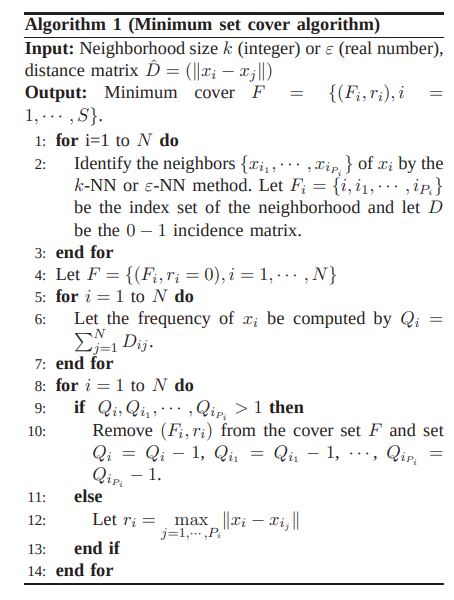

#### Реализация на Python

In [ ]:
import numpy as np
def cover_algo_1(distance_matrix, k = 5):
    N = distance_matrix.shape[0]
    F = {}
    Q = np.zeros(N)
    for i in range(N):
        F_i = np.argsort(distance_matrix[i, :])[0 : k + 1]
        Q[F_i] += 1
        F[i] = (F_i, [0.0])
    for i in range(N):
        if np.all(Q[F[i][0]] > 1):
            Q[F[i][0]] -= 1
            del F[i]
        else:
            F[i][1][0] = np.max(distance_matrix[i, F[i][0]])
    return F

#### Пример покрытия при k = 50

Число покрытий: 71


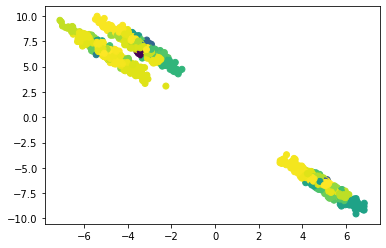

In [ ]:
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
X, y = datasets.make_blobs(n_samples=2000, random_state=23)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
dist = euclidean_distances(X_aniso, X_aniso)
F = cover_algo_1(dist, k = 50)
print("Число покрытий:", len(F))
color = np.zeros(2000)
for key, value in F.items():
    for i in range(len(value[0])):
        color[value[0][i]] = key
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = color)

### Итоговая реализация алгоритма
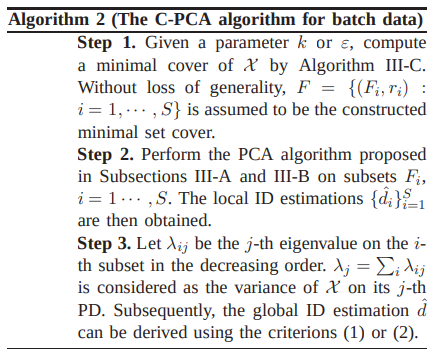

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

def C_PCA(X, k = 20, alpha = 10, beta = 0.8):
    P = 0.95
    F = cover_algo_1(euclidean_distances(X, X), k)
    var = np.zeros(X.shape[1])
    d = []
    for key, value in F.items():
        pca = PCA().fit(X[value[0], :])
        explained_var = pca.explained_variance_
        # устранение шума
        r = np.where(np.cumsum(explained_var) / sum(explained_var) > P)[0][0]
        sigma = np.mean(explained_var[r:])
        explained_var -= sigma
        # проверка условий (1) и (2)
        gaps = explained_var[:-1] / explained_var[1:]
        de = 1 + np.min(
            np.concatenate(
                (
                    np.where(gaps > alpha)[0],
                    np.where(
                        (np.cumsum(explained_var) / sum(explained_var)) > beta
                    )[0],
                )
            )
        )
        # сохраняю результаты
        d.append(de)
        var += explained_var

    # Получаем глобальный результат на основе локальных
    gaps = var[:-1] / var[1:]
    result_d = 1 + np.min(
        np.concatenate(
            (
                np.where(gaps > alpha)[0],
                np.where(
                    (np.cumsum(explained_var) / sum(explained_var)) > beta
                )[0],
            )
        )
    )
    return result_d, var



### Отличительной особенностью C-PCA является возможность добавления точек и быстрого пересчёта параметров
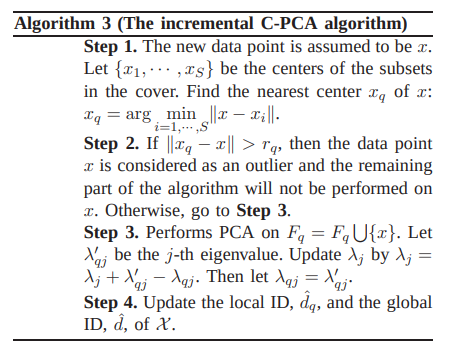

### Оценка сложности
Оценка вычислительной сложности может быть разделена на две части:



1.   Для вычисления матрицы расстояний
требуется $O (N^2)$ времени, для поиска ближайших соседей для
каждой точки данных требуется $O (kN^2)$ времени, а для нахождения
приблизительного минимального покрытия $X$ требуется $O (kN)$ времени.
Следовательно, для первой части требуется $O((K + 1)N^2 + kN)$
2.    Во второй части для выполнения PCA локально
требуется $k^3 × (N/k) ≈ O(k^2N)$ времени.

В итоге суммарное время выполнения составляет:
$O((k + 1)N^2 + (k^2 +k)N)$

# [Estimating the intrinsic dimension of datasets by a minimal neighborhood information](https://www.nature.com/articles/s41598-017-11873-y)
Elena Facco , Maria d’Errico, Alex Rodriguez & Alessandro Laio

Предлагается новая оценка внутренней размерности, использующая только расстояние первого и
второго ближайших соседей каждой точки в выборке. Эта крайняя минимальность позволяет уменьшить
влияние кривизны, изменения плотности и, как следствие, вычислительных затрат. Оценка внутренней размерности
теоретически точна в равномерно распределенных наборах данных и в целом обеспечивает согласованные показатели.

## Математическая основа для алгоритма

Пусть $i$ точки в наборе данных и рассмотрим список
его первых $k$ ближайших соседей; пусть $r_ {1}, r_{2}, \ldots, r_{k}$ будет отсортированным списком их расстояний от $i$. Таким образом, $r_ {1}$ - это расстояние между $i$ и его ближайшим соседом, $r_ {2}$ - расстояние до его второго ближайшего соседа и так далее; в этом определении мы условно устанавливаем $r_ {0} =0$.

Объем оболочки, заключенной между двумя последовательными соседями $l-1$ и $l$, задается формулой

$$
\Delta v_{l}=\omega_{d}\left(r_{l}^{d}-r_{l-1}^{d}\right),
$$

где $d$ - размерность пространства, в которое вложены точки, а $\omega_ {d}$ - объем сферы в размерности $d$ с единым радиусом. Можно доказать (см. [Supplementary information](https://www.nature.com/articles/s41598-017-11873-y)), что, если **плотность постоянна вокруг точки** $ i$, все $\Delta v_{l}$ независимо извлекаются из экспоненциального распределения с параметром скорости, равным плотности $ \rho $ :

$$
P\left(\Delta v_{l} \in[v, v+d v]\right)=\rho e^{-\rho v} d v
$$

Рассмотрим две оболочки $\Delta v_ {1} $ и $\Delta v_ {2}$, и пусть $ R$ будет величиной $\frac {\Delta v_ {i}} {\Delta v_ {j}}$; предыдущие соображения позволяют нам в случае постоянной плотности точно вычислить распределение вероятностей $R$ :

$$
\begin{aligned}
P &(R \in[\bar{R}, \bar{R}+d \bar{R}]) \\
&=\int_{0}^{\infty} d v_{i} \int_{0}^{\infty} d v_{j} \rho^{2} e^{-\rho\left(v_{i}+v_{j}\right)} 1\left[\frac{v_{j}}{v_{i}} \in[\bar{R}, \bar{R}+d \bar{R}]\right\} \\
&=d \bar{R} \frac{1}{(1+\bar{R})^{2}},
\end{aligned}
$$

где $1$ представляет функцию индикатора. Разделив на $d \bar {R}$, мы получим распределение вероятностей для $R$ :

$$
g(R)=\frac{1}{(1+R)^{2}}
$$

явно не зависящую от размерности $d$, но которая присутствует в определении $R$. Чтобы работать с функцией распределения, явно зависящим от $d$, мы определяем величину $\mu \equiv \frac{r_{2}}{r_{1}} \in[1,+\infty) . $
$R$ и $\mu$ связаны равенством:

$$
R=\mu^{d}-1 .
$$

Это уравнение позволяет найти явную формулу для плотности распределения $\mu$ :

$$
f(\mu)=d \mu^{-d-1} 1_{[1,+\infty]}(\mu),
$$

в то время как функция распределения получается путем интегрирования:

$$
F(\mu)=\left(1-\mu^{-d}\right) 1_{[1,+\infty]}(\mu) .
$$

Функции $f$ и $F$ не зависят от локальной плотности, но явно зависят от внутренней размерности $d$.

Вывод, представленный выше, приводит к простому наблюдению: значение внутренней размерности $ d$ может быть оценено с помощью следующего уравнения

$$
\frac{\log (1-F(\mu))}{\log (\mu)}=d
$$


Если мы рассмотрим множество $S\subset\mathbb{R}^{2}, S\equiv \{(\log (\mu),-\log (1-F(\mu)))\}$, то предыдущее уравнение утверждает, что теоретически $S$ содержится на прямой линии $l \equiv \{(x, y) \mid y=d * x\}$ , проходящей через начало координат и имеющей наклон, равный $ d$. На практике $F (\mu)$ оценивается эмпирически из конечного числа точек.

## Алгоритм

1. Вычислите попарные расстояния для каждой точки в наборе данных $i=1, \ldots, N$.

2. Для каждой точки $i$ найдите два кратчайших расстояния $r_ {1}$ и $r_ {2}$.

3. Для каждой точки $i$ вычислите $\mu_{i}=\frac{r_{2}}{r_{1}}$.

4. Вычислите эмпирическую функцию распределения $F ^{e m p}(\mu)$ путем сортировки значений $\mu$ в порядке возрастания с помощью перестановки $\sigma$, затем определите $F ^{emp}\left(\mu_{\sigma(i)}\right) \equiv \frac{i}{N}$.

5. Сопоставьте точки плоскости, заданные координатами  $\left\{\left(\log \left(\mu_{i}\right),-\log \left(1-F^{emp}\left(\mu_{i}\right)\right)\right) \mid i=1, \ldots, N\right\}$ с прямой линией, проходящей через начало координат.


$(*)$  Часто при определении прямой, на наклон сильно влияют несколько точек, характеризующихся высоким
значением $\mu$.
В распределениях, характеризующихся тяжелыми хвостами, существует значительная вероятность наличия $r_{2} \gg r_{1}$ и
большого значения отношения $\frac{r_{2}}{r_{2}}$.
Это делает процедуру определения прямой нестабильной. Чтобы справиться с этой ситуацией и сделать процедуру более надежной, мы отбрасываем 10% точек, характеризующихся наибольшими значениями $\mu$





Описанный эффект можно рассмотреть на примере:


Функция апроксимирующая прямую $l(x)$ в трех образцовых наборах данных по 2500 точек. В первой строке мы отображаем наборы данных, в то время как во втором мы представляем набор данных $S$ (красные точки) вместе с отброшенными точками (10%) (серые точки) и прямой $l(x) $. 

Панель A, A': куб в измерении 14 (на панели A представлены только первые 3 координаты). Панель B, B': Swiss Roll. Панель C, C': набор данных Коши в измерении 20 (представлены только первые 3 координаты).


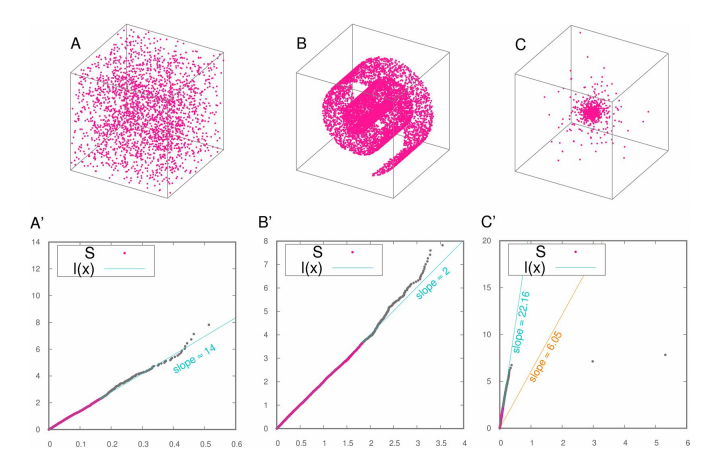





В [Supplementary information](https://www.nature.com/articles/s41598-017-11873-y) более подробно обсуждается
эффект отбрасывания различных долей точек данных и показывается, что оценка для измерения является надежной
по отношению к этому порогу.

### Реализация на Python

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import pairwise_distances_chunked
from sklearn.neighbors import NearestNeighbors

def TWO_NN(X, discard_fraction = 0.1):
    N = len(X)

    # mu = r2/r1 мю из математических основ
    # для больших размерностей, используем генератор матрицы расстояний
    if X.shape[1] > 25:
        distmat_chunks = pairwise_distances_chunked(X)
        _mu = np.zeros((len(X)))
        i = 0
        for x in distmat_chunks:
            x = np.sort(x, axis=1)
            r1, r2 = x[:, 1], x[:, 2]
            _mu[i : i + len(x)] = r2 / r1
            i += len(x)
    else:  
        dists, _ = NearestNeighbors(n_neighbors = 2).fit(X).kneighbors(return_distance=True)
        r1, r2 = dists[:, 0], dists[:, 1]
        _mu = r2 / r1
    
    # discard the largest distances
    mu = _mu[np.argsort(_mu)[: int(N * (1 - discard_fraction))]]

    # Empirical cumulate
    Femp = np.arange(int(N * (1 - discard_fraction))) / N

    # Fit line
    lr = LinearRegression(fit_intercept=False)
    lr.fit(np.log(mu).reshape(-1, 1), -np.log(1 - Femp).reshape(-1, 1))

    d = lr.coef_[0][0]  # extract slope

    return (
            d, # внутренняя размерность
            #данные для построения графика
            np.log(mu).reshape(-1, 1), 
            -np.log(1 - Femp).reshape(-1, 1),
    )

# Тестирование приведённых алгоритмов
Мной был протестирован обычно используемый эталонный набор синтетических многообразий с известной внутренней размерностью, описанный Hein и др. и Campadelli и др. в статье (Campadelli et al. (2015), Intrinsic Dimension Estimation: Relevant Techniques and a Benchmark Framework. Mathematical Problems in Engineering)

## Данные для тестирования:



1.   'M10d_Cubic': (70, 71, '70D hypercube')
2.   'M10c_Cubic': (24, 25, '24D hypercube')
3.   'M11_Moebius': (2, 3, 'Möebius band 10-times twisted')
4.  'M13a_Scurve': (2, 3, '2D S-curve')
5.   'M7_Roll': (2, 3, 'Swiss Roll')
6.   'M8_Nonlinear': (12, 72, 'Nonlinear (highly curved) manifold')


In [ ]:
pip install scikit-dimension

     |████████████████████████████████| 63 kB 1.6 MB/s 


In [ ]:
from skdim.datasets import BenchmarkManifolds

## Тестирование TWO-NN

В оценках, основанных на ближайших соседях, эталонный масштаб - это размер окрестности, участвующей в оценке; Зависит от плотности точек в выборке и не обязательно совпадает с интересующим масштабом. Например, при рассмотрении плоскости с шумом, чем больше точек данных используется для оценки, тем меньше будет среднее расстояние второго соседа и тем больше $ID$. Эти наблюдения предполагают, что для проверки актуальности нашей меры мы можем изучить стабильность оценки по отношению к изменениям размера окрестности. В случае TWO-NN можно изменить размер окрестности, уменьшив количество точек в наборе данных: чем меньше $N$, тем больше среднее расстояние до второго соседа. На практике, анализ масштабирования измерения в зависимости от количества точек может быть выполнен путем извлечения подвыборок из набора данных и мониторинга изменения оценки $ \hat {d}$ относительно количества точек $N$. Соответствующий $ID$ набора данных можно получить, найдя диапазон $ N $, для которого $ \hat {d} (N) $ является постоянным, и, следовательно, имеет плато на графике $\hat {d} (N) $.

##Тестирование TWO-NN без шума

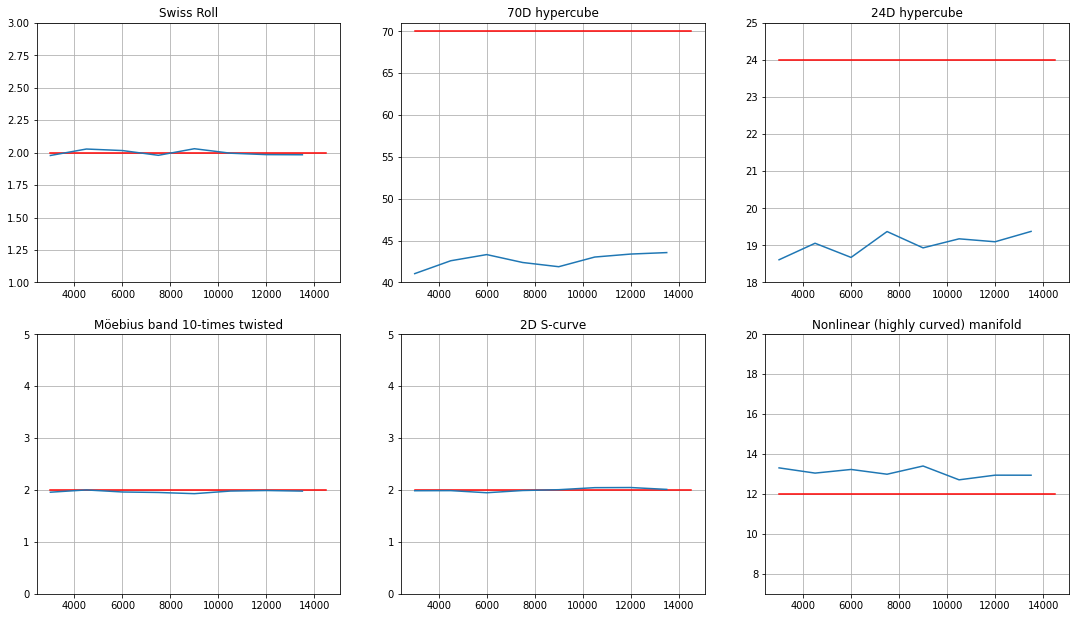

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =3 )
fig.set_size_inches(18.5, 10.5)
axes[0,0].set(title='Swiss Roll')
axes[0,1].set(title='70D hypercube')
axes[0,2].set(title='24D hypercube')
axes[1,0].set(title='Möebius band 10-times twisted')
axes[1,1].set(title='2D S-curve')
axes[1,2].set(title='Nonlinear (highly curved) manifold')

axes[0, 0].set_ylim(1, 3)
axes[0, 1].set_ylim(40, 71)
axes[0, 2].set_ylim(18, 25)
axes[1, 0].set_ylim(0, 5)
axes[1, 1].set_ylim(0, 5)
axes[1, 2].set_ylim(7, 20)

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()


axes[0, 0].plot([3000, 14500], [2, 2], c = 'r')
axes[0, 1].plot([3000, 14500], [70, 70], c = 'r')
axes[0, 2].plot([3000, 14500], [24, 24], c = 'r')
axes[1, 0].plot([3000, 14500], [2, 2], c = 'r')
axes[1, 1].plot([3000, 14500], [2, 2], c = 'r')
axes[1, 2].plot([3000, 14500], [12, 12], c = 'r')


test = BenchmarkManifolds(noise_type = 'uniform')

N = 15000
data = test.generate(name = 'all', n = N)
name_tests = ['M7_Roll', 'M10d_Cubic', 'M10c_Cubic', 'M11_Moebius', 'M13a_Scurve', 'M8_Nonlinear']
results = []
curr_test = 0
for i in [0, 1]:
    for j in [0, 1, 2]:
        X = data[name_tests[curr_test]]        
        y = []
        x = np.arange(20, 100, 10) / 100 
        for z in x:
            curr_size = int(N * z)
            part = np.random.choice(a = np.arange(N), size = curr_size, replace = False)
            curr_ans, _, _ = TWO_NN(X[part, :])
            y.append(curr_ans)
        axes[i, j].plot(np.array(x) * N, y)
        curr_test += 1
    
plt.show()

##Тестирование TWO-NN c равномерным шумом на отрезке [-0.125, 0.125]:

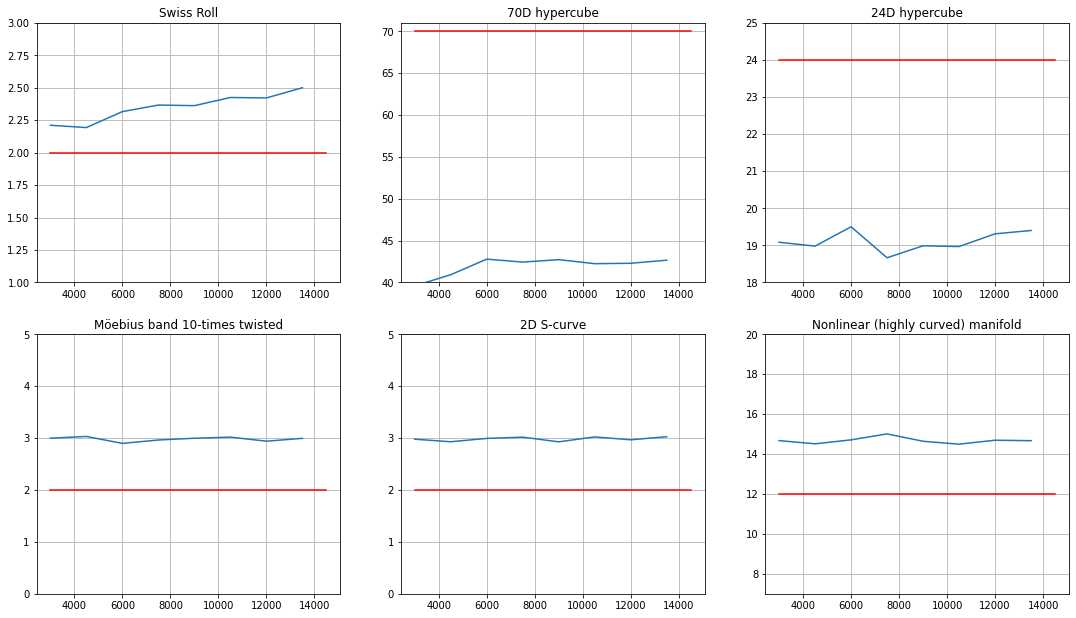

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =3 )
fig.set_size_inches(18.5, 10.5)
axes[0,0].set(title='Swiss Roll')
axes[0,1].set(title='70D hypercube')
axes[0,2].set(title='24D hypercube')
axes[1,0].set(title='Möebius band 10-times twisted')
axes[1,1].set(title='2D S-curve')
axes[1,2].set(title='Nonlinear (highly curved) manifold')

axes[0, 0].set_ylim(1, 3)
axes[0, 1].set_ylim(40, 71)
axes[0, 2].set_ylim(18, 25)
axes[1, 0].set_ylim(0, 5)
axes[1, 1].set_ylim(0, 5)
axes[1, 2].set_ylim(7, 20)

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()


axes[0, 0].plot([3000, 14500], [2, 2], c = 'r')
axes[0, 1].plot([3000, 14500], [70, 70], c = 'r')
axes[0, 2].plot([3000, 14500], [24, 24], c = 'r')
axes[1, 0].plot([3000, 14500], [2, 2], c = 'r')
axes[1, 1].plot([3000, 14500], [2, 2], c = 'r')
axes[1, 2].plot([3000, 14500], [12, 12], c = 'r')


test = BenchmarkManifolds(noise_type = 'uniform')

N = 15000
data = test.generate(name = 'all', n = N, noise = 0.25)
name_tests = ['M7_Roll', 'M10d_Cubic', 'M10c_Cubic', 'M11_Moebius', 'M13a_Scurve', 'M8_Nonlinear']
results = []
curr_test = 0
for i in [0, 1]:
    for j in [0, 1, 2]:
        X = data[name_tests[curr_test]]        
        y = []
        x = np.arange(20, 100, 10) / 100 
        for z in x:
            curr_size = int(N * z)
            part = np.random.choice(a = np.arange(N), size = curr_size, replace = False)
            curr_ans, _, _ = TWO_NN(X[part, :], 0.2)
            y.append(curr_ans)
        axes[i, j].plot(np.array(x) * N, y)
        curr_test += 1
    
plt.show()

### Итог:

1. (верно) быть осуществимым с вычислительной точки зрения
2. (Неверно)  быть устойчивым к масштабированию(шуму)
3. (Неверно)  быть устойчивым к высоким размерностям данных
4. (Верно) иметь стабильную минимальную мощность данных необходимую для надёжной оценки 
5. (Верно) быть точным, т.е. давать верную оценку ID

Можно отметить, что многие оценки, основанные на окрестностях, обычно недооценивают ID, когда его значение достаточно велико. TWO-NN подтвердил этот факт на данных высокой размерности.

# Тестирование C-PCA без шума

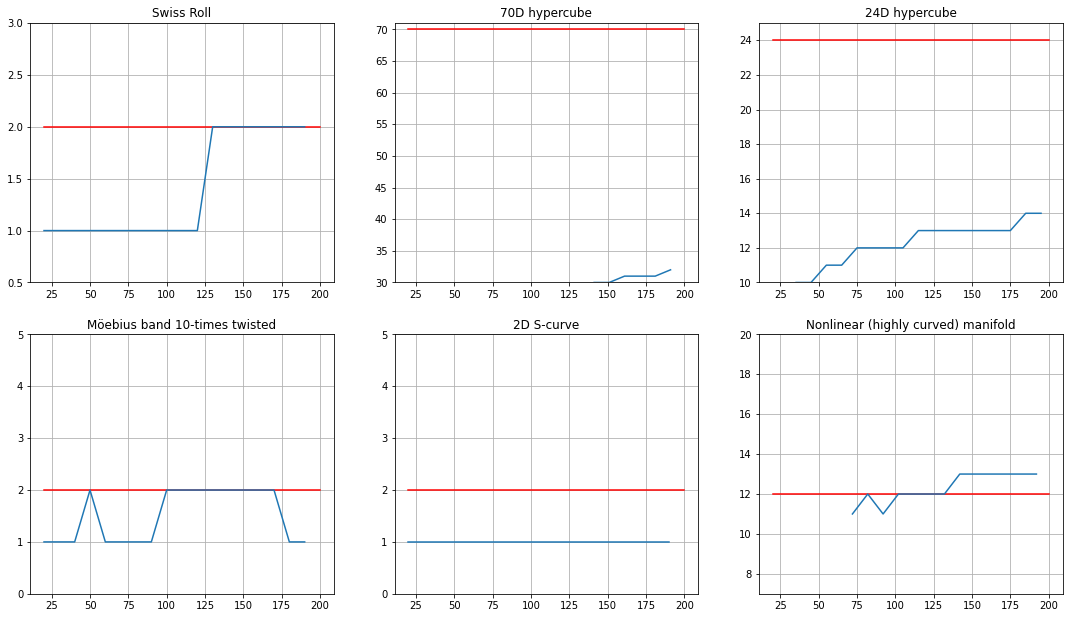

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =3 )
fig.set_size_inches(18.5, 10.5)
axes[0,0].set(title='Swiss Roll')
axes[0,1].set(title='70D hypercube')
axes[0,2].set(title='24D hypercube')
axes[1,0].set(title='Möebius band 10-times twisted')
axes[1,1].set(title='2D S-curve')
axes[1,2].set(title='Nonlinear (highly curved) manifold')

axes[0, 0].set_ylim(0.5, 3)
axes[0, 1].set_ylim(30, 71)
axes[0, 2].set_ylim(10, 25)
axes[1, 0].set_ylim(0, 5)
axes[1, 1].set_ylim(0, 5)
axes[1, 2].set_ylim(7, 20)

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()


axes[0, 0].plot([20, 200], [2, 2], c = 'r')
axes[0, 1].plot([20, 200], [70, 70], c = 'r')
axes[0, 2].plot([20, 200], [24, 24], c = 'r')
axes[1, 0].plot([20, 200], [2, 2], c = 'r')
axes[1, 1].plot([20, 200], [2, 2], c = 'r')
axes[1, 2].plot([20, 200], [12, 12], c = 'r')


test = BenchmarkManifolds(noise_type = 'uniform')

N = 2500
data = test.generate(name = 'all', n = N, noise = 0)
name_tests = ['M7_Roll', 'M10d_Cubic', 'M10c_Cubic', 'M11_Moebius', 'M13a_Scurve', 'M8_Nonlinear']
curr_test = 0
for i in [0, 1]:
    for j in [0, 1, 2]:
        X = data[name_tests[curr_test]]        
        y = []
        x = np.arange(max(20, X.shape[1]) , 200, 10) 
        for z in x:
            curr_ans, _ = C_PCA(X, k = z)
            y.append(curr_ans)
        axes[i, j].plot(np.array(x), y)
        curr_test += 1
    
plt.show()

##Тестирование С-PCA c равномерным шумом на отрезке [-0.25, 0.25]:

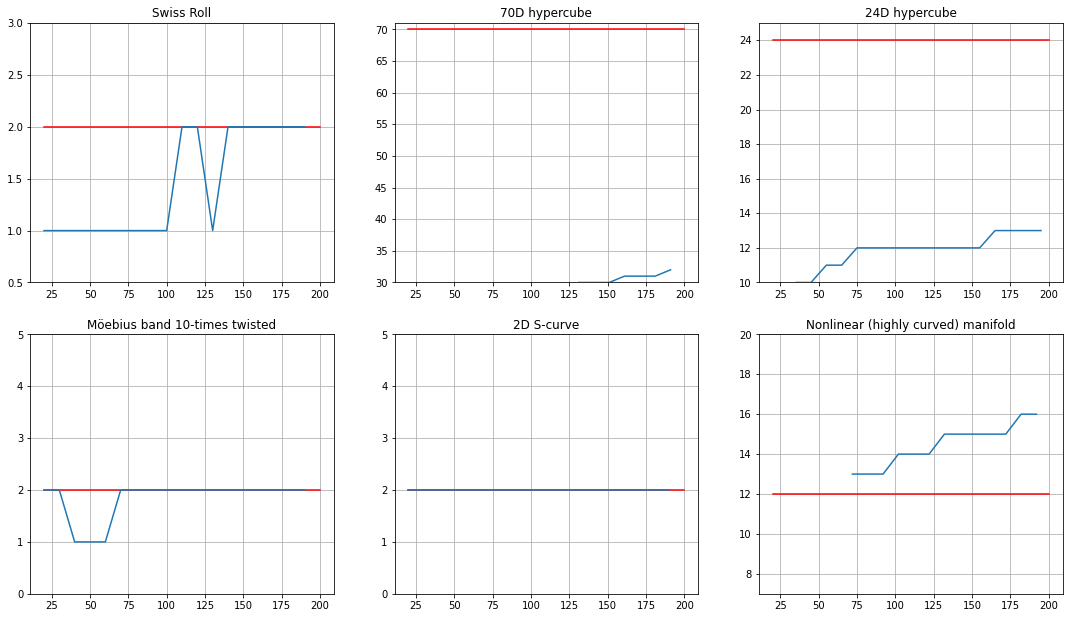

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =3 )
fig.set_size_inches(18.5, 10.5)
axes[0,0].set(title='Swiss Roll')
axes[0,1].set(title='70D hypercube')
axes[0,2].set(title='24D hypercube')
axes[1,0].set(title='Möebius band 10-times twisted')
axes[1,1].set(title='2D S-curve')
axes[1,2].set(title='Nonlinear (highly curved) manifold')

axes[0, 0].set_ylim(0.5, 3)
axes[0, 1].set_ylim(30, 71)
axes[0, 2].set_ylim(10, 25)
axes[1, 0].set_ylim(0, 5)
axes[1, 1].set_ylim(0, 5)
axes[1, 2].set_ylim(7, 20)

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()


axes[0, 0].plot([20, 200], [2, 2], c = 'r')
axes[0, 1].plot([20, 200], [70, 70], c = 'r')
axes[0, 2].plot([20, 200], [24, 24], c = 'r')
axes[1, 0].plot([20, 200], [2, 2], c = 'r')
axes[1, 1].plot([20, 200], [2, 2], c = 'r')
axes[1, 2].plot([20, 200], [12, 12], c = 'r')


test = BenchmarkManifolds(noise_type = 'uniform')

N = 2500
data = test.generate(name = 'all', n = N, noise = 0.5)
name_tests = ['M7_Roll', 'M10d_Cubic', 'M10c_Cubic', 'M11_Moebius', 'M13a_Scurve', 'M8_Nonlinear']
curr_test = 0
for i in [0, 1]:
    for j in [0, 1, 2]:
        X = data[name_tests[curr_test]]        
        y = []
        x = np.arange(max(20, X.shape[1]) , 200, 10) 
        for z in x:
            curr_ans, _ = C_PCA(X, k = z)
            y.append(curr_ans)
        axes[i, j].plot(np.array(x), y)
        curr_test += 1
    
plt.show()

### Итог:

1. (верно) быть осуществимым с вычислительной точки зрения
2. (Верно)  быть устойчивым к масштабированию(шуму)
3. (Неверно)  быть устойчивым к высоким размерностям данных
4. (Верно) иметь стабильную минимальную мощность данных необходимую для надёжной оценки 
5. (Верно) быть точным, т.е. давать верную оценку ID

Алгоритм показал небольшие изменения при добавлении шума, но всё же показал слабость в работе с данными высокой внутренней размерности и очень требователен к валидации параметра соседей - $k$

# Итог:
По совокупности приведённых критериев, TWO-NN продемонстрировал лучшую работу на тестах чем C-PCA, **НО** стоит очень внимательно относится к преположениям заложеннным в работу алгоритмов для получения надёжных результатов. 


C-PCA же продемонстрировал нестабильность при тестировании. Кроме того, он не имеет доказателсва сходимости.


# Выводы, сделанные в ходе работы:
(1) Теперь я намного лучше понимаю, что информация преподаваемая в Вузе - это великолепные бриллианты, по сравнению с кривыми алмазами в статьях, которые в чаще остаются алмазной крошкой(

(2) Современные методы обработки данных требуют всесторонней математической подготовки. Моя тема требовала очень глубокого понимания линейно алгебры, теории вероятностей.

(3) Моё мнение: задача понижения размерности довольно сложна в общем смысле (т.е. выполнение всех критериев: 1-5). Как, мне кажется, задача требует поиска подходов для конкретных подобластей c ослабленными ограничениями.

(4) Обязательно пройдусь по списку тем, которые я слабо осознал в процессе чтения и исследую их поглубже. (Концентрация меры, работа в метрических пространствах (размерность Хаусдорфа и т.д.), основы топологии, спетральнуая теория графов)

(5) Подчеркнул различные интересные математические идеи

(6) Появился интерес к следующим шагам - к методами непосредственного понижения размерности UMAP, t-sne, Isomap и т.д. и прочтению оставшихся методов

(7) Испытал восторг от осознания свойств спектра от ковариационной матрицы

(8) Обнаружил ошибку в skdim. Реализация алгоритма C-PCA (FanPCA в skdim) не выполняет поиск покрытия, а лишь учитывает идею из про учёт шума из статьи.
